<a href="https://colab.research.google.com/github/UdeS-PMF/gmq710_test/blob/develop/a2024_gmq710_firststep_suite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation d'une image avec K-Means

La méthode K-Means permet de définir des centres (vecteurs) capables de représenter au mieux l'image. La méthode consiste à déterminer au mieux des centres de groupes (clusters) qui décrivent au mieux l'image.

# Importation des libs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Chargement d'une image

In [ ]:
# Charger une image RGB
image_path = "/content/HDRI_Sample_Scene_Balls_(JPEG-HDR).jpg"
image = io.imread(image_path)

# Récupérer les dimensions de l'image
height, width, bands = image.shape

# Segmentation de l'image

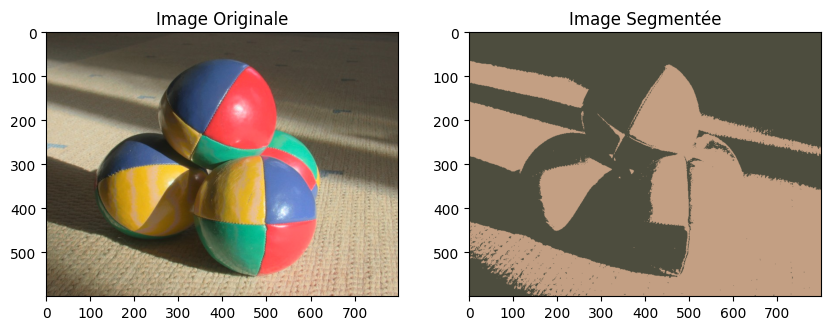

In [ ]:
# Appliquer K-means pour la segmentation
k = 2  # Nombre de clusters

# on convertit l'image 2d en une immense ligne
pixels = image.reshape((-1, bands))

# on initialise K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
# on entraine K-Means
kmeans.fit(pixels)

# la méthode va retourner la liste des centres
# et la valeur de chaque groupe pour chaque pixel

# Assigner chaque pixel à un cluster (on va utiliser le centre de chaque groupe)
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape((height, width, bands))

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Image Segmentée')

plt.show()

Si on souhaite afficher le label pour chaque pixel

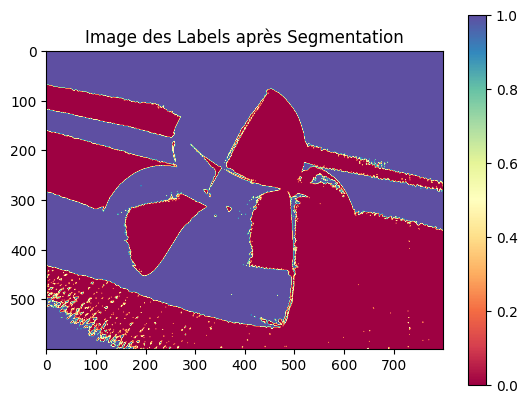

In [ ]:
# Récupérer les labels attribués à chaque pixel
labels = kmeans.labels_
labels_image = labels.reshape((height, width))

# Afficher l'image des labels
plt.imshow(labels_image, cmap='Spectral')  # Utilisez une colormap appropriée
plt.title('Image des Labels après Segmentation')
plt.colorbar()
plt.show()